In [43]:
import numpy as np
import matplotlib.pyplot as plt

It is also possible to have implicit runge kutta methods where each slope depends on those ahead of it and not just the ones before it. Below we demonstrate one of the simplest possible implicit methods for the equation,
y' = y, y(0) = 1:

    y_n+1 = y_n + dt*(k1 + k2)/2

    k1 = y_n + k1/4
    k2 = y_n + k1/2 + k2/4

and here is code to solve the system and compute the steps:

[[1.01265823 0.        ]
 [0.02563692 1.01265823]]


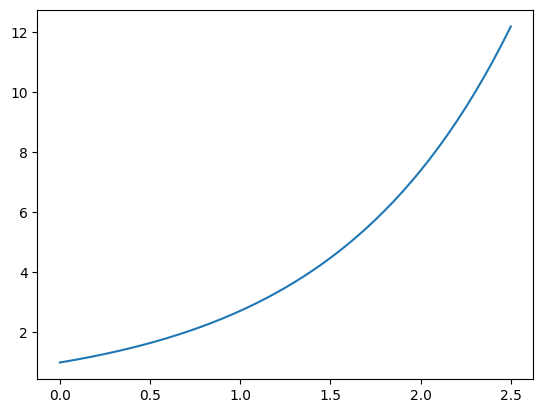

In [44]:
y1 = [1.0]
dt = 0.05
t = [0]

# if dt = 0.01 the computation looks like this:
# k1 = y_n + 0.025*k1
# k2 = y_n + 0.05*k1 + 0.025*k2
# =>
# 0.975*k1 = y_n
# -0.05*k1 + 0.975*k2 = y_n
# [[0.975, 0.0], [-0.05, 0.975]] * [k1, k2] = [y_n, y_n]

A = np.linalg.inv(np.array([[1.0 - dt/4.0, 0.0], [-dt/2.0, 1.0 - dt/4.0]]))
print(A)
for i in range(50):

    yn = [y1[i], y1[i]]
    k = np.dot(A, yn)
    y1.append(y1[i] + dt*(k[0] + k[1])/2.0)
    t.append(t[i] + dt)


plt.plot(t, y1)
plt.show()

We can also use a more complicated method that is fully implicit:

    y_n+1 = y_n + dt*((1/2 + sqrt(3)/2)*k1 + (1/2 - sqrt(3)/2)*k2)

    k1 = y_n + k1/4 + (1/4 - sqrt(3)/6)*k2
    k2 = y_n + (1/4 + sqrt(3)/6)*k1 + k2/4

In [45]:
y2 = [1.0]

B = np.linalg.inv(np.array([[1.0 - dt/4.0, -dt*(0.25 - np.sqrt(3.0)/6.0)], 
                            [-dt*(0.25 - np.sqrt(3.0)/6.0), 1.0 - dt/4.0]]))
print(A)
for i in range(50):

    yn = [y2[i], y2[i]]
    kc = np.dot(A, yn)
    y2.append(y1[i] + dt*(k[0]*(0.5 + 0.5*np.sqrt(3.0)) + k[1]*(0.5 - 0.5*np.sqrt(3.0))))


[[1.01265823 0.        ]
 [0.02563692 1.01265823]]


We can compare the difference in the accuracy of the schemes. the first is second order and the second is fourth order. The solutions slowly grow away as error accumulates 

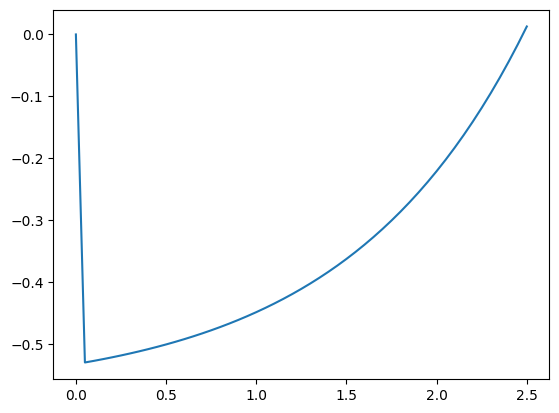

In [46]:
delta = [y1[i] - y2[i] for i in range(51)]
plt.plot(t, delta)
plt.show()

In the case of a nonlinear ODE we will of course have a system of nonlinear algebraic equations defining the slopes. We can use iterative methods to solve the system but note that we will now have to solve at each timestep where in the linear case we only had to compute a single matrix vector product each step after inverting the matrix. Consider the equation: y' = y*(1-t)


[2.718281828459045, 2.9670225447221106, 3.218891810381661, 3.4676455334994336, 3.7065081888678084, 3.9284457464089764, 4.126487372004124, 4.29407230735144, 4.4253948910921235, 4.515719899958713, 4.56164247521253, 4.561271660216577, 4.514323449396858, 4.4221174081912835, 4.287479402490112, 4.114560817036814, 3.908591027605829, 3.6755842429722865, 3.4220238646986685, 3.1545472401671852, 2.879651384438612, 2.60343639123664, 2.331398423972994, 2.068278978513606, 1.8179720920239868, 1.5834867800156884, 1.3669585195263763, 1.1697012141770005, 0.9922897931416911, 0.8346633154754077, 0.6962390000321012, 0.5760287625316753, 0.4727513874936753, 0.38493518113053204, 0.31100766239319827, 0.24937041678990632, 0.19845857083752297, 0.15678539659178564, 0.12297331462216922, 0.09577304687620622, 0.07407291369961135, 0.05690031774802348, 0.04341736081559468, 0.032912344822719763, 0.024788656833122355, 0.01855226391078464, 0.013798772551979845, 0.010200757097932738, 0.007495842745389652, 0.00547584663574

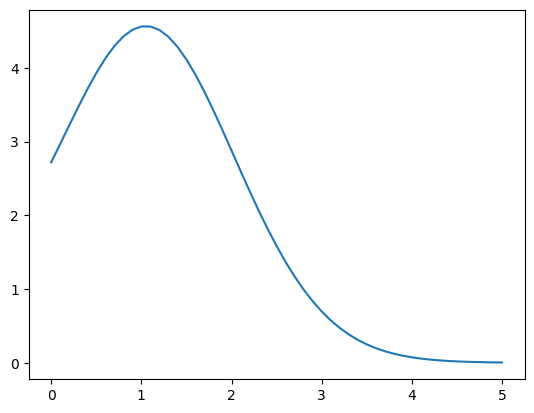

In [47]:
y1 = [np.e]
dt = 0.1
t = [0]

a = [[0.25, 0.25 - np.sqrt(3.0)/6.0],
     [0.25 + np.sqrt(3.0)/6.0, 0.25]]
c = [0.5 - np.sqrt(3)/6.0, 0.5 + np.sqrt(3)/6.0]
b = [0.5 + np.sqrt(3)/2.0, 0.5 - np.sqrt(3)/2.0]

for i in range(50):

    kp = np.array([0.0, 0.0])
    kc = np.array([1.0, 1.0])
    while np.linalg.norm(kp-kc) > 1e-2:
        f = np.array([(y1[i] + kc[0]*a[0][0] + kc[1]*a[0][1])*(1 - t[i] - dt*c[0]) - kc[0]
                    ,(y1[i] + kc[0]*a[1][0] + kc[1]*a[1][1])*(1 - t[i] - dt*c[1]) - kc[1]])

        J = np.array([[a[0][0]*(1 - t[i] - dt*c[0]) - 1, a[0][1]*(1 - t[i] - dt*c[0])],
                    [a[1][0]*(1 - t[i] - dt*c[1]), a[1][1]*(1 - t[i] - dt*c[1]) - 1]])
        kp = kc
        kc = kc - np.dot(np.linalg.inv(J), f)

    y1.append(y1[i] + dt*np.dot(kc, b))
    t.append(t[i] + dt)

print(y1)
plt.plot(t, y1)
plt.show()